In [3]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from scipy.misc import imread
from scipy import ndimage

from skimage import data
from skimage import filters
from skimage import img_as_float, img_as_ubyte
from skimage import exposure


In [4]:
# We shall start by exploring convolution and correlation in one dimension. This can be achieved by
# means of the ndimage.convolve and ndimage.correlate functions. What are the default values for padding? (reflect)

a = np.array([0,0,0,1,0,0,0]);
f = np.array([1,2,3,4,5]);

res = ndimage.convolve(a,f)  
print(res)
res = ndimage.correlate(a,f)
print(res)


[0 1 2 3 4 5 0]
[0 5 4 3 2 1 0]


In [17]:
# Let us see how correlation works on a small window of size 3 x 3 and a matrix. The correlation of
# two matrices is a sum of products. Numerically, the calculation would be as follows:

# (140)x(-1) + (108)x(0) + (94)x(1) + (89)x(-2) + (99)x(0) + (125)x(2) + (121)x(-1) + (134)x(0) + (221)x(1) = 126

# 1. Perform the correlation of the two matrices: x = [140,108,94;89,99,125;121,134,221] with y = [-1,0,1;-2,0,2;-1,0,1] and 
# see the result. Pad your image by a constant value of 0. Where is the position of 126 in the resulted correlation?
# 2. Create your own function to calculate the correlation between an image and a mask.


# http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.pad


# 1
x = [ [140,108,94], [89,99,125], [121,134,221] ]
y = [ [-1,0,1], [-2,0,2], [-1,0,1] ]

final_res = ndimage.correlate( x,y )
print( final_res )


# 2
final_res = np.pad(final_res, (1,1), 'constant', constant_values=(0, 0))
print( final_res )

def correlateImageWithMask( image, mask ):
    
    return ndimage.correlate( image, mask )


print( correlateImageWithMask( x, y ) )


[[ -86 -102  -16]
 [   1  126  125]
 [  49  336  287]]
[[   0    0    0    0    0]
 [   0  -86 -102  -16    0]
 [   0    1  126  125    0]
 [   0   49  336  287    0]
 [   0    0    0    0    0]]
[[ -86 -102  -16]
 [   1  126  125]
 [  49  336  287]]


In [23]:
# To perform convolution, we use the same technique as in correlation. The difference here is that the
# filter matrix is rotated 180degrees before performing the sum of products. Numerically, the calculation would be as follows:

# (140)x(1) + (108)x(0) + (94)x(-1) + (89)x(2) + (99)x(0) + (125)x(-2) + (121)x(1) + (134)x(0) + (221)x(-1) = -126

# 1. Perform the convolution of the two matrices: x = [140,108,94;89,99,125;121,134,221] with y = [-1,0,1;-2,0,2;-1,0,1] and 
# see the result. Pad your image by a constant value of 0. 
# 2. Create your own function to calculate the convolution between an image and a mask.


# 1

x = [ [140,108,94], [89,99,125], [121,134,221] ]
y = [ [-1,0,1], [-2,0,2], [-1,0,1] ]

res = ndimage.convolve( x, y )  
print(res)

# 2
res = np.pad( res, (1,1), 'constant', constant_values=(0, 0))
print( res )

def convoluteImageWithMask( image, mask ):
    
    return ndimage.convolve( image, mask )


print( convoluteImageWithMask( x, y ) )



# 2


[[  86  102   16]
 [  -1 -126 -125]
 [ -49 -336 -287]]
[[   0    0    0    0    0]
 [   0   86  102   16    0]
 [   0   -1 -126 -125    0]
 [   0  -49 -336 -287    0]
 [   0    0    0    0    0]]
[[  86  102   16]
 [  -1 -126 -125]
 [ -49 -336 -287]]


[[156 159 159 ... 151 152 152]
 [160 155 156 ... 154 154 153]
 [157 157 158 ... 152 153 152]
 ...
 [115 129 128 ... 135 132 113]
 [121 125 126 ... 134 126 112]
 [121 125 127 ... 134 127 112]]


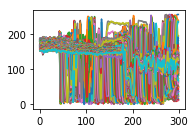

In [31]:
# Load the cameraman.png image and prepare a subplot. Apply an average filter with a mask 11x11 to the image and see the result.
# What was the effect of the averaging filter?

import imageio

orig_img = imageio.imread('cameraman.png')

print(orig_img )

ax1=plt.subplot(2, 2, 1)
plt.plot( orig_img )


# Create a nonuniform version of the mean filter. Use 11x11 size for the mask. 




In [ ]:
# The Gaussian filter is similar to the nonuniform averaging filter in that the coeficients are not
# equivalent. The coefficient values, however, are not a function of their distance from the center
# pixel, but instead are modeled from the Gaussian curve. Create a Gaussian mask and display
# the kernel as a 3D plot. 

from mpl_toolkits import mplot3d

 



In [ ]:
# Filter the cameraman.png image using a Gaussian filter and compare the results with the average mask.
# Experiment different values of sigma



In [ ]:
# Create a laplacian mask and apply it to the moon.tif image. See the result. 
# What is the minimum value of the fltered image?
# Verify that a uint8 filtered image would not reflect negative numbers. You can use the image that was previously loaded. 
# Create a sharpened image using the laplacian filtered image.

# 1

# 2



# 3


# 4





In [ ]:
# Unsharp masking is a simple process of subtracting a blurred image from its original to generate a sharper image. 
# First perform an average filtering
# Second subtract the previous image with the original 
# Third add the previous image with the original 

# Unsharp the moon image.

# 1



# 2


# 3


In [ ]:
# You can also unsharp an image by subtraction with a blurred image after adjusting the image intensity values. 
# Implement and see the result. Use the previous image. 




In [ ]:
# High-boost filtering is a sharpening technique that involves creating a sharpening image and adding
# it to the original image. 

# Create a high-boost mask with [[0 -1 0][-1 A+4 -1][0 -1 0]] with A = 1 and apply it to the previous image moon.tif
# What happens to the output image when A is less than 1? What about when A is greater than 1?
# Show that a high-boost mask when A = 3 looks similar to the image simply multiplied by 3.


# 1


# 2


# 3


# 4
